### Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import joblib

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)

In [2]:
# Load the train and test set

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type,Sale Condition,Lot Frontage_na,Mas Vnr Area_na,Bsmt Full Bath_na,Bsmt Half Bath_na,Garage Yr Blt_na,Garage Cars_na,Garage Area_na,BsmtFin SF 1_na,BsmtFin SF 2_na,Bsmt Unf SF_na,Total Bsmt SF_na
0,0.181818,0.333333,0.388581,0.321612,1.0,0.0,0.000000,0.333333,1.0,0.25,0.0,0.142857,0.666667,1.0,0.75,0.0,0.555556,0.75,0.176471,0.176471,0.0,0.0,0.8,0.2,0.333333,0.00000,0.666667,0.75,0.25,0.75,0.50,0.000000,0.2,0.087349,0.0,0.0,0.435360,0.247136,0.0,1.0,1.0,1.000000,0.571588,0.648765,0.0,0.724749,0.000000,0.0,0.50,0.0,0.625,0.5,0.50,0.454545,0.25,0.50,0.6,0.00,0.176471,0.0,0.50,0.349462,0.25,0.5,1.0,0.000000,0.737197,0.0,0.0,1.0,0.0,0.0,0.75,0.0,1.0,0.454545,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.727273,0.666667,0.530342,0.283439,1.0,0.5,0.333333,0.333333,1.0,0.25,0.0,0.333333,0.666667,1.0,0.75,0.8,0.555556,0.75,0.352941,0.352941,0.0,0.0,0.6,0.7,0.666667,0.02875,0.333333,0.50,0.50,0.75,0.75,0.666667,0.8,0.089653,0.0,0.0,0.000000,0.082815,1.0,0.5,1.0,1.000000,0.465982,0.000000,0.0,0.398239,0.333333,0.0,0.25,0.0,0.375,0.5,0.50,0.272727,1.00,0.25,0.6,0.75,0.352941,0.0,0.50,0.330645,0.50,0.5,1.0,0.335632,0.016173,0.0,0.0,0.0,0.0,0.0,0.50,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.818182,0.666667,0.461171,0.329968,1.0,0.5,0.000000,1.000000,1.0,0.00,0.0,0.238095,0.666667,1.0,0.75,0.6,0.333333,0.50,0.000000,0.000000,1.0,0.0,0.6,0.6,0.666667,0.03000,0.333333,0.50,0.50,0.50,0.50,0.000000,0.4,0.092133,0.0,0.0,0.188356,0.157119,1.0,0.5,1.0,0.333333,0.374021,0.000000,0.0,0.307036,0.333333,0.0,0.25,0.0,0.375,0.5,0.50,0.272727,1.00,0.00,0.0,0.75,0.000000,1.0,0.25,0.290323,0.50,0.5,0.5,0.137931,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.363636,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.909091,0.666667,0.199504,0.138795,1.0,0.5,0.333333,0.333333,1.0,1.00,0.0,0.523810,0.666667,1.0,0.25,0.6,0.777778,0.50,0.588235,0.588235,0.0,0.0,0.2,0.2,0.333333,0.00000,0.666667,0.50,0.50,0.75,0.50,1.000000,1.0,0.152374,0.0,0.0,0.075342,0.169558,1.0,0.5,1.0,1.000000,0.404080,0.000000,0.0,0.336846,0.333333,0.0,0.25,0.0,0.125,0.5,0.75,0.090909,1.00,0.25,0.6,0.00,0.588235,1.0,0.50,0.325269,0.50,0.5,1.0,0.152874,0.145553,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.727273,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.818182,0.666667,0.412469,0.257197,1.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.666667,0.666667,1.0,0.75,0.6,0.666667,0.50,0.000000,0.000000,0.0,0.0,1.0,0.9,1.000000,0.05125,0.666667,0.50,1.00,0.75,0.50,0.666667,1.0,0.128278,0.0,0.0,0.217466,0.201637,1.0,1.0,1.0,1.000000,0.472439,0.000000,0.0,0.404643,0.333333,0.0,0.50,0.0,0.250,0.5,0.75,0.272727,1.00,0.00,0.0,0.75,0.000000,0.5,0.50,0.424731,0.50,0.5,1.0,0.151724,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# load log transformed target

y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,SalePrice
0,12.452933
1,11.925035
2,11.458997
3,12.144197
4,12.178187


In [4]:
# load the selected features

features = pd.read_csv('selected_features.csv')

features = features['0'].to_list()

features


['MS SubClass',
 'MS Zoning',
 'Lot Area',
 'Lot Shape',
 'Neighborhood',
 'Condition 1',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Roof Style',
 'Exterior 1st',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Total Bsmt SF',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Paved Drive',
 'Wood Deck SF',
 'Screen Porch',
 'Fence',
 'Sale Condition']

In [5]:
# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

### Regularized linear regression: Lasso

In [6]:
# setup the model
lin_model = Lasso(alpha=0.001, random_state=0)

# train the model
lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=0)

To get the the true performance of the model, the target need to be transformed back from being log transformed. Then evaluate the performance using mean squared error, root and r2

In [7]:
# make predictions for the train set
pred= lin_model.predict(X_train)

# determine mse, rmse, r2 
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))

print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))

print('train r2: {}'.format(r2_score(np.exp(y_train), np.exp(pred))))

print()
# make predictions for the test set
pred = lin_model.predict(X_test)

# determine mse, rmse, r2

print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test),np.exp(pred)))))

print('test rmse: {}'.format(int(mean_squared_error(
                        np.exp(y_test),np.exp(pred), squared=False))))

print('test r2: {}'.format(r2_score(np.exp(y_test), np.exp(pred))))

print()


print('Average house price: ', int(np.exp(y_train).median()))


train mse: 605964667
train rmse: 24616
train r2: 0.9016914192930405

test mse: 951352527
test rmse: 30844
test r2: 0.8604356272712754

Average house price:  159999


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

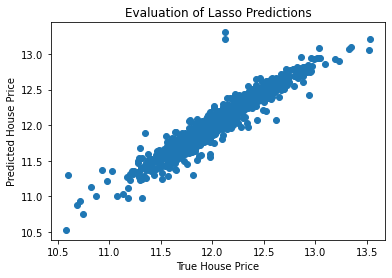

In [8]:
# Evaluate the predictions with respect to the real Sale Price

plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

In [9]:
# have a look at house prices and predictions
y_test.reset_index(drop=True)

,SalePrice
0,12.301383
1,11.870600
2,12.546110
3,11.813030
4,11.540307
...,...
962,11.970350
963,10.747208
964,11.904968
965,12.127570


In [10]:
preds=pd.Series(lin_model.predict(X_test))

preds

0      12.204045
1      11.955777
2      12.539294
3      11.758234
4      11.432448
         ...    
962    11.883822
963    10.751151
964    11.857982
965    12.123033
966    12.076603
Length: 967, dtype: float64

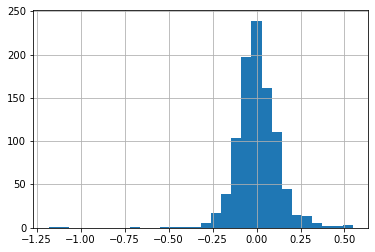

In [11]:
# evaluate the distribution of the error

errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

The distribution of the errors follow a gausian distribution and this suggest that the model is doing a good job.

### Feature Importance


Text(0.5, 1.0, 'Feature Importance')

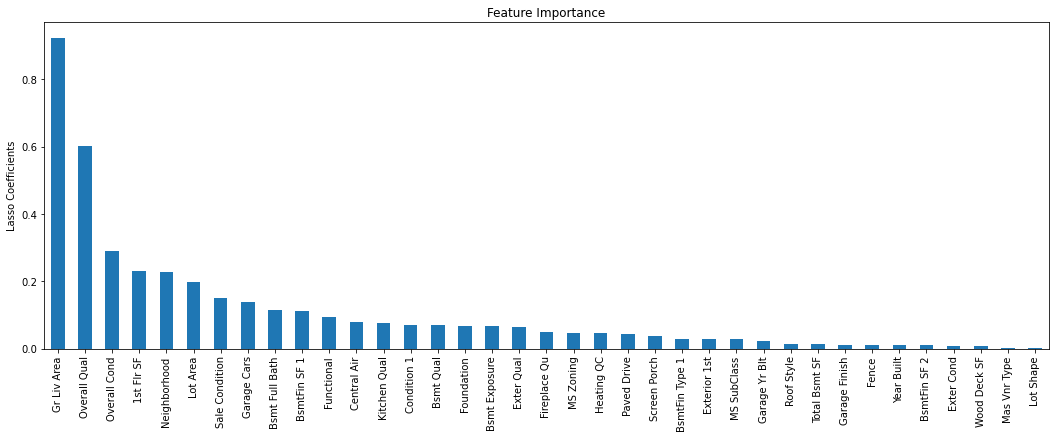

In [14]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

In [17]:
lin_model.coef_

array([ 0.02734045,  0.04661841,  0.19642619,  0.00098216,  0.22772908,
        0.0702585 ,  0.60039077,  0.28844697, -0.00979013,  0.01276021,
        0.02804145,  0.00311542,  0.06399549,  0.0062552 ,  0.06679202,
        0.0695407 ,  0.0664096 ,  0.02941902,  0.11050872,  0.00976804,
        0.01253288,  0.04610228,  0.07892948,  0.23046135,  0.92261058,
        0.11435823,  0.07668645,  0.09285123,  0.04935722, -0.02335604,
        0.01166361,  0.13941711,  0.04213726,  0.00615789,  0.0373022 ,
        0.01096081,  0.15048995])

### Save the model



In [18]:
joblib.dump(lin_model, 'linear_regression.joblib')

['linear_regression.joblib']